In [1]:
import time
t1 = time.time()

import math
import numpy as np
import uproot
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

import ripser
import persim

In [2]:
##### setting file path #####

event_path = "/data/mucollider/two_boosted/hhvv_500K/delphes_output.root"
data_file = uproot.open(event_path)

##### read data with features #####

features = ["VLCjetR10N2", "VLCjetR10N2.Eta", "VLCjetR10N2.Phi", "VLCjetR10N2.Particles", "Particle", "Particle.PID", "Particle.Status", "Particle.Eta", "Particle.Phi", "Particle.PT"]
events = []

for feature in features:
    events.append(data_file["Delphes;1"][feature].array())

##### reshape the data #####

events = np.expand_dims(events, axis=-1)
events = events.transpose((1,0,2))
events = np.squeeze(events,axis=(2,))

num_events = len(events)

print("Time:{:^8.4f}(s)".format(time.time()-t1))

/usr/local/lib/python3.8/dist-packages/awkward/array/base.py:394: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return cls.numpy.array(value, copy=False)


Time:50.3672 (s)


In [3]:
# ###### Print Particle Status #####

# event_num = 1

# print("Index", "\t", "Status", "\t", "PID", "\t", "Eta", "\t\t", "Phi", "\t", "PT")
# for particle in range(len(events[event_num][features.index("Particle.Status")])):
#     print(particle, "\t", events[event_num][features.index("Particle.Status")][particle], "\t\t", events[event_num][features.index("Particle.PID")][particle], "\t", round(events[event_num][features.index("Particle.Eta")][particle],2), "\t\t", round(events[event_num][features.index("Particle.Phi")][particle],2), "\t", round(events[event_num][features.index("Particle.PT")][particle],2))

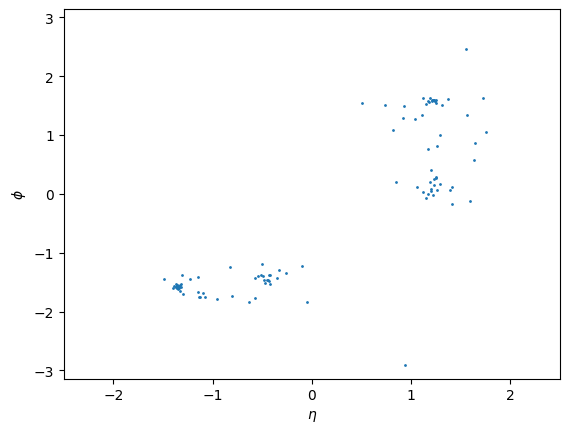

In [4]:
##### plot particle scatter #####

event_num = 9527
event = events[event_num]
neutrino_ID = [12, 14, 16, -12, -14, -16]

##### find particles in 2 Fat Jet #####

# where_jet_particle = event[features.index("VLCjetR10N2.Particles")][0]+event[features.index("VLCjetR10N2.Particles")][1]
# where_jet_particle = np.array(where_jet_particle)-1

##### find the particles in the event and do neutrino veto #####

where_jet_particle = np.where(event[features.index("Particle.Status")]==1)[0]
where_neutrino = np.where(np.isin(event[features.index("Particle.PID")], neutrino_ID))[0]
where_jet_particle = np.delete(where_jet_particle, np.isin(where_jet_particle, where_neutrino))

##### Do particle PT cut #####

particle_PT = event[features.index("Particle.PT")][where_jet_particle]

particle_PTcut = 0
where_PT_larger = np.where(particle_PT>particle_PTcut)
where_jet_particle = where_jet_particle[where_PT_larger]
particle_PT = event[features.index("Particle.PT")][where_jet_particle]

##### centerize the particle #####

center_eta = (event[features.index("VLCjetR10N2.Eta")][0]+event[features.index("VLCjetR10N2.Eta")][1])/2    
center_phi = (event[features.index("VLCjetR10N2.Phi")][0]+event[features.index("VLCjetR10N2.Phi")][1])/2
particle_eta = event[features.index("Particle.Eta")][where_jet_particle]-center_eta
particle_phi = event[features.index("Particle.Phi")][where_jet_particle]-center_phi

##### check if particles are larger than pi and fix them #####

where_larger_pi = np.where(particle_phi>np.pi)
particle_phi[where_larger_pi] = -(2*np.pi - particle_phi[where_larger_pi])    ### check if jet particle split
where_smaller_mpi = np.where(particle_phi<-np.pi)
particle_phi[where_smaller_mpi] = 2*np.pi + particle_phi[where_smaller_mpi]    ### check if jet particle split

plt.scatter(particle_eta, particle_phi, s=1)
plt.xlabel("$\eta$")
plt.ylabel("$\phi$")
plt.xlim(-2.5, 2.5)
plt.ylim(-np.pi, np.pi)
plt.show()

data shape (105, 2)


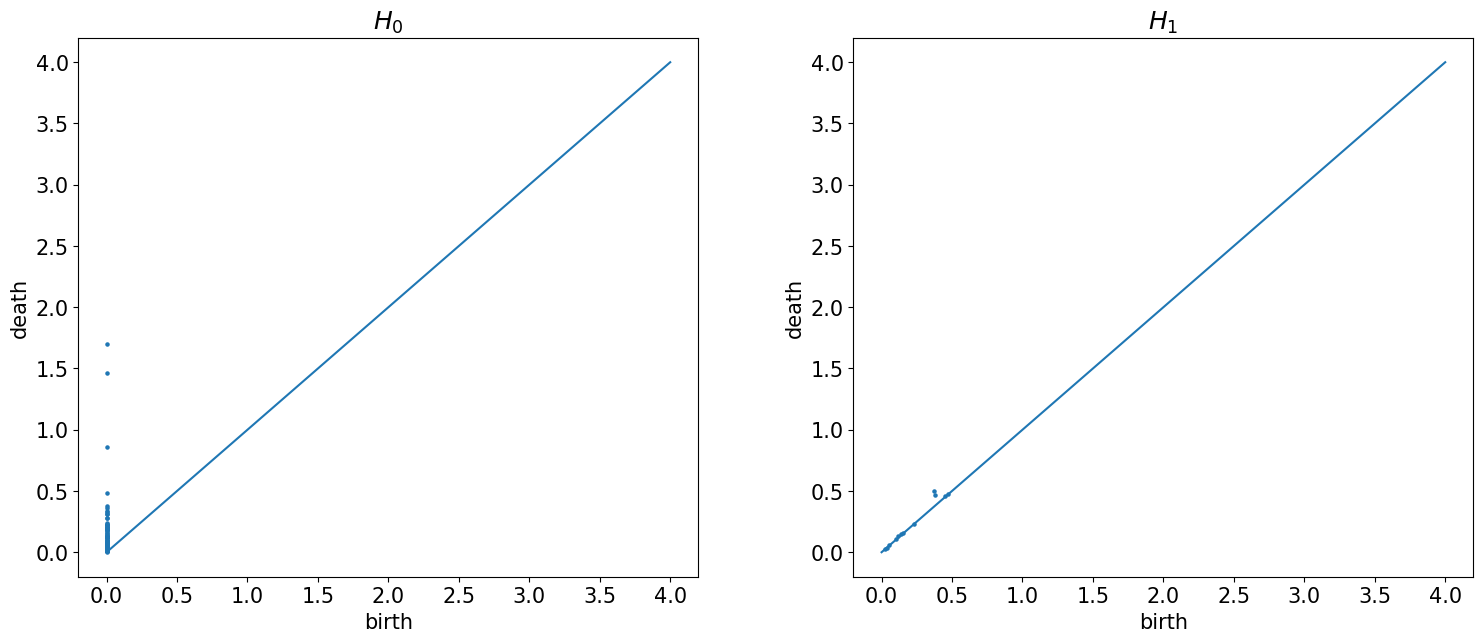

In [5]:
##### calculate TDA #####

P = np.array([particle_eta, particle_phi]).T
print("data shape", np.shape(P))

diagrams = ripser.ripser(P)['dgms']

##### plot the birth death plot #####

plt.figure(1, figsize=(18,7))
plt.subplots_adjust(wspace=0.25)

ax1 = plt.subplot(121)
ax1.scatter(diagrams[0][:,0], diagrams[0][:,1], s=5)
ax1.plot([0,4], [0,4])
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel("birth", fontsize=15)
plt.ylabel("death", fontsize=15)
plt.title(r"$H_0$", fontsize=18)

ax2 = plt.subplot(122)
ax2.scatter(diagrams[1][:,0], diagrams[1][:,1], s=5)
ax2.plot([0,4], [0,4])
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel("birth", fontsize=15)
plt.ylabel("death", fontsize=15)
plt.title(r"$H_1$", fontsize=18)

plt.show()

In [6]:
diagrams

[array([[0.00000000e+00, 1.38502032e-03],
        [0.00000000e+00, 5.96580887e-03],
        [0.00000000e+00, 6.34679804e-03],
        [0.00000000e+00, 6.59735082e-03],
        [0.00000000e+00, 6.94199745e-03],
        [0.00000000e+00, 7.83634465e-03],
        [0.00000000e+00, 9.80533008e-03],
        [0.00000000e+00, 1.06863352e-02],
        [0.00000000e+00, 1.20768482e-02],
        [0.00000000e+00, 1.23366266e-02],
        [0.00000000e+00, 1.29147284e-02],
        [0.00000000e+00, 1.42870974e-02],
        [0.00000000e+00, 1.52738467e-02],
        [0.00000000e+00, 1.57390386e-02],
        [0.00000000e+00, 1.57685876e-02],
        [0.00000000e+00, 1.58844497e-02],
        [0.00000000e+00, 1.59486085e-02],
        [0.00000000e+00, 1.75290424e-02],
        [0.00000000e+00, 1.75617691e-02],
        [0.00000000e+00, 1.75966099e-02],
        [0.00000000e+00, 1.77166257e-02],
        [0.00000000e+00, 1.87450591e-02],
        [0.00000000e+00, 1.88532788e-02],
        [0.00000000e+00, 1.9288467